In [75]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score
# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [89]:
#making the path to the csv and reading it in
filepath = "cleaned_data/clean_battle_info.csv"

battle_info = pd.read_csv(filepath)
print(battle_info.shape)
battle_info.head(50)

(2351, 8)


,Character,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome,Universe
0,Wonder Woman,7,8,3,Telekinesis,Kryptonite,0,DC Comics
1,Iron Man,4,7,9,Telekinesis,Kryptonite,0,Marvel
2,Iron Man,8,7,5,Telekinesis,Magic,0,Marvel
3,Spider-Man,5,6,10,Telekinesis,Kryptonite,0,Marvel
4,Flash,7,6,2,Invisibility,Magic,0,DC Comics
5,Spider-Man,10,9,7,Invisibility,Wooden Stake,1,Marvel
6,Wonder Woman,3,6,2,Super Strength,Silver,1,DC Comics
7,Thor,7,2,4,Invisibility,Magic,1,Marvel
8,Batman,8,2,7,Flight,Silver,0,DC Comics
9,Iron Man,5,5,4,Flight,Wooden Stake,0,Marvel


In [3]:
battle_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2351 non-null   object
 1   Strength          2351 non-null   int64 
 2   Speed             2351 non-null   int64 
 3   Intelligence      2351 non-null   int64 
 4   SpecialAbilities  2351 non-null   object
 5   Weaknesses        2351 non-null   object
 6   BattleOutcome     2351 non-null   int64 
 7   Universe          2351 non-null   object
dtypes: int64(4), object(4)
memory usage: 147.1+ KB


In [4]:
battle_info['SpecialAbilities'].unique()

array(['Telekinesis', 'Invisibility', 'Super Strength', 'Flight'],
      dtype=object)

In [5]:
battle_info['Weaknesses'].unique()

array(['Kryptonite', 'Magic', 'Wooden Stake', 'Silver'], dtype=object)

In [6]:
#making a copy of the DF just to be safe
battle_info2 = battle_info.copy()

In [7]:
# #making list of character names to make it eaiser
# marvel_characters = ['Iron Man','Spider-Man','Thor','Captain America']

In [8]:
# feature engineering

# 1. one hot encoding the special abilities column to make the strings numbers
battle_encoded = pd.get_dummies(battle_info2, columns=['SpecialAbilities'])


# 2. also one hot encoding the weakness column
battle_encoded2 = pd.get_dummies(battle_encoded, columns=['Weaknesses'])
battle_encoded2.head()

,Character,Strength,Speed,Intelligence,BattleOutcome,Universe,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake
0,Wonder Woman,7,8,3,0,DC Comics,False,False,False,True,True,False,False,False
1,Iron Man,4,7,9,0,Marvel,False,False,False,True,True,False,False,False
2,Iron Man,8,7,5,0,Marvel,False,False,False,True,False,True,False,False
3,Spider-Man,5,6,10,0,Marvel,False,False,False,True,True,False,False,False
4,Flash,7,6,2,0,DC Comics,False,True,False,False,False,True,False,False


In [9]:
# label encoding the universe to make it easier for the models later just in case
le = LabelEncoder()
battle_encoded2['Universe_encoded'] = le.fit_transform(battle_encoded2['Universe'])
battle_encoded2.head()

,Character,Strength,Speed,Intelligence,BattleOutcome,Universe,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake,Universe_encoded
0,Wonder Woman,7,8,3,0,DC Comics,False,False,False,True,True,False,False,False,0
1,Iron Man,4,7,9,0,Marvel,False,False,False,True,True,False,False,False,1
2,Iron Man,8,7,5,0,Marvel,False,False,False,True,False,True,False,False,1
3,Spider-Man,5,6,10,0,Marvel,False,False,False,True,True,False,False,False,1
4,Flash,7,6,2,0,DC Comics,False,True,False,False,False,True,False,False,0


In [10]:
#dropping the universe column after its been encoded
battle_encoded2.drop(columns= 'Universe', inplace=True)

In [11]:
battle_encoded2.head()

,Character,Strength,Speed,Intelligence,BattleOutcome,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake,Universe_encoded
0,Wonder Woman,7,8,3,0,False,False,False,True,True,False,False,False,0
1,Iron Man,4,7,9,0,False,False,False,True,True,False,False,False,1
2,Iron Man,8,7,5,0,False,False,False,True,False,True,False,False,1
3,Spider-Man,5,6,10,0,False,False,False,True,True,False,False,False,1
4,Flash,7,6,2,0,False,True,False,False,False,True,False,False,0


In [12]:
battle_encoded2.columns

Index(['Character', 'Strength', 'Speed', 'Intelligence', 'BattleOutcome',
       'SpecialAbilities_Flight', 'SpecialAbilities_Invisibility',
       'SpecialAbilities_Super Strength', 'SpecialAbilities_Telekinesis',
       'Weaknesses_Kryptonite', 'Weaknesses_Magic', 'Weaknesses_Silver',
       'Weaknesses_Wooden Stake', 'Universe_encoded'],
      dtype='object')

#### pipeline encoding with the original dataset 
this is really to see how the data compares to what i just encoded 

In [13]:
# making a third copy because im scared to lose the og dataframe
battle_pipeline = battle_info.copy()

In [14]:
battle_pipeline.columns

Index(['Character', 'Strength', 'Speed', 'Intelligence', 'SpecialAbilities',
       'Weaknesses', 'BattleOutcome', 'Universe'],
      dtype='object')

In [42]:
# trying the preporcessing pipeline from titanic v3 with the original data set

# Define preprocessing for numeric features 
#i dont know if this is the best thing to do but we will see
numeric_features = ['Strength', 'Speed', 'Intelligence'] 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features 
binary_features = ['SpecialAbilities', 'Weaknesses', 'Universe']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features
categorical_features = ['Character']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [96]:
# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(battle_pipeline)

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features + binary_features +
                         list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features)))

battle_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
# battle_final["BattleOutcome"] = df.Survived
battle_final.head(13)

,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,Universe,Character_Batman,Character_Captain America,Character_Flash,Character_Iron Man,Character_Spider-Man,Character_Superman,Character_Thor,Character_Wonder Woman
0,0.537620,0.879933,-0.890985,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.498117,0.530073,1.204769,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.882866,0.530073,-0.192401,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.152871,0.180213,1.554061,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.537620,0.180213,-1.240278,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.573357,1.229792,0.506184,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,-0.843363,0.180213,-1.240278,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.537620,-1.219227,-0.541693,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.882866,-1.219227,0.506184,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.152871,-0.169647,-0.541693,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [91]:
#checking what values were encoded to the abilities and weaknesses for the HTML code
# Access the OrdinalEncoder from the binary transformer
ordinal_encoder = binary_transformer.named_steps['label']

# Access the mapping of categories to numbers for each binary feature
for feature in binary_features:
    categories_mapping = ordinal_encoder.categories_[0]  # Get categories for the first binary feature
    encoded_values = ordinal_encoder.transform([categories_mapping]).flatten()
    mapping_dict = dict(zip(categories_mapping, encoded_values))
    print(f'Mapping for {feature}:', mapping_dict)

AttributeError: 'OrdinalEncoder' object has no attribute 'categories_'

In [88]:
battle_final.SpecialAbilities.unique()

array([3., 1., 2., 0.])

In [17]:
# okay cool the pipeline looked like it work but i dont know what it means?
# i think this is what its supposed to look like 
# i really dont know 

In [44]:
corrs = battle_final.corr()
corrs

,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,Universe,Character_Batman,Character_Captain America,Character_Flash,Character_Iron Man,Character_Spider-Man,Character_Superman,Character_Thor,Character_Wonder Woman
Strength,1.000000,-0.041399,0.011212,-0.002435,-0.015819,-0.009846,0.022005,-0.028083,0.012566,0.000705,-0.015051,-0.004331,0.026272,-0.014438
Speed,-0.041399,1.000000,-0.001245,-0.033530,0.008725,0.024570,-0.002893,0.009085,0.007175,0.015283,-0.016500,-0.024231,0.028592,-0.016414
Intelligence,0.011212,-0.001245,1.000000,0.002756,-0.029280,0.027617,-0.019608,0.034756,0.025013,0.013362,-0.012483,-0.020770,0.006378,-0.025802
SpecialAbilities,-0.002435,-0.033530,0.002756,1.000000,0.032002,0.007239,0.006066,0.029726,-0.023794,-0.031438,0.004277,-0.025271,0.009790,0.031900
Weaknesses,-0.015819,0.008725,-0.029280,0.032002,1.000000,-0.001971,0.006367,0.005162,-0.012545,-0.005712,-0.001178,0.002567,-0.001027,0.006517
Universe,-0.009846,0.024570,0.027617,0.007239,-0.001971,1.000000,-0.362760,0.369678,-0.373012,0.392762,0.370434,-0.383125,0.386131,-0.385276
Character_Batman,0.022005,-0.002893,-0.019608,0.006066,0.006367,-0.362760,1.000000,-0.134104,-0.138458,-0.142478,-0.134379,-0.142212,-0.140073,-0.143010
Character_Captain America,-0.028083,0.009085,0.034756,0.029726,0.005162,0.369678,-0.134104,1.000000,-0.137894,-0.141898,-0.133831,-0.141633,-0.139503,-0.142428
Character_Flash,0.012566,0.007175,0.025013,-0.023794,-0.012545,-0.373012,-0.138458,-0.137894,1.000000,-0.146505,-0.138176,-0.146231,-0.144032,-0.147052
Character_Iron Man,0.000705,0.015283,0.013362,-0.031438,-0.005712,0.392762,-0.142478,-0.141898,-0.146505,1.000000,-0.142188,-0.150477,-0.148214,-0.151321


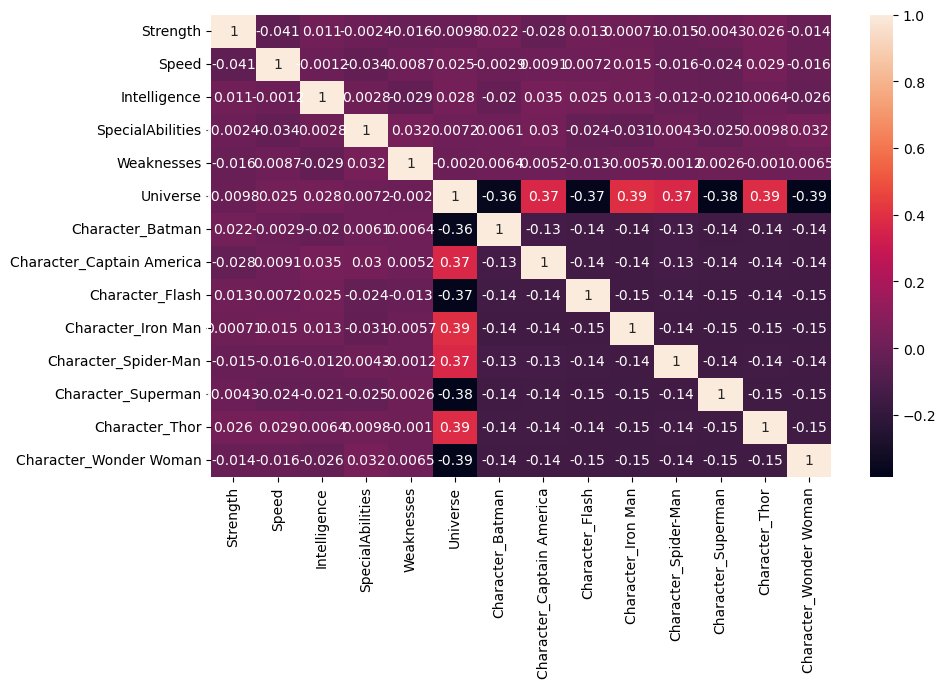

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(corrs, annot=True)
plt.show()

In [47]:
battle_encoded2.columns

Index(['Character', 'Strength', 'Speed', 'Intelligence', 'BattleOutcome',
       'SpecialAbilities_Flight', 'SpecialAbilities_Invisibility',
       'SpecialAbilities_Super Strength', 'SpecialAbilities_Telekinesis',
       'Weaknesses_Kryptonite', 'Weaknesses_Magic', 'Weaknesses_Silver',
       'Weaknesses_Wooden Stake', 'Universe_encoded'],
      dtype='object')

In [48]:
# Step 1: Get the data (NOTE: this is the original dataframe, not the one used for the correlations)
X = battle_encoded2.drop(columns=["BattleOutcome", "Character"])
y = battle_encoded2.BattleOutcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(1763, 12) (588, 12)


In [49]:
X_train.head() # NOTE: THIS IS UNSCALED & UNENCODED

,Strength,Speed,Intelligence,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake,Universe_encoded
1723,2,9,2,False,False,False,True,False,False,False,True,0
813,4,3,6,False,True,False,False,False,True,False,False,1
1575,1,10,3,False,False,True,False,False,False,True,False,1
764,10,10,5,False,False,True,False,False,False,True,False,1
2235,9,3,7,False,True,False,False,True,False,False,False,0


In [50]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[1156  115]
 [ 219  273]]
    
    AUC: 0.8671025951014819

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.91      0.87      1271
           1       0.70      0.55      0.62       492

    accuracy                           0.81      1763
   macro avg       0.77      0.73      0.75      1763
weighted avg       0.80      0.81      0.80      1763

    
TEST METRICS
    Confusion Matrix: 
    [[380  44]
 [ 72  92]]
    
    AUC: 0.84826564657156

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.90      0.87       424
           1       0.68      0.56      0.61       164

    accuracy                           0.80       588
   macro avg       0.76      0.73      0.74       588
weighted avg       0.79      0.80      0.80       588

    


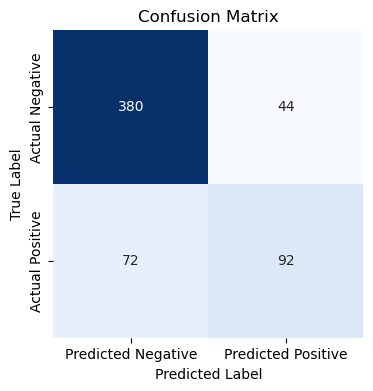

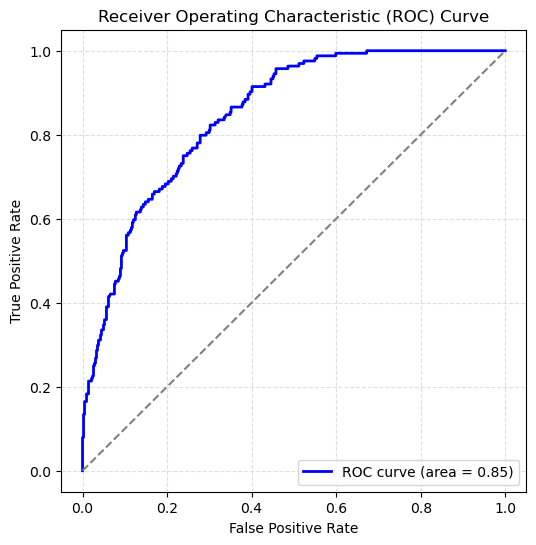

In [41]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1271    0]
 [  20  472]]
    
    AUC: 0.9996801698937524

    Classification Report:
                  precision    recall  f1-score   support

           0       0.98      1.00      0.99      1271
           1       1.00      0.96      0.98       492

    accuracy                           0.99      1763
   macro avg       0.99      0.98      0.99      1763
weighted avg       0.99      0.99      0.99      1763

    
TEST METRICS
    Confusion Matrix: 
    [[335  89]
 [ 74  90]]
    
    AUC: 0.6769443166129775

    Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.79      0.80       424
           1       0.50      0.55      0.52       164

    accuracy                           0.72       588
   macro avg       0.66      0.67      0.66       588
weighted avg       0.73      0.72      0.73       588

    


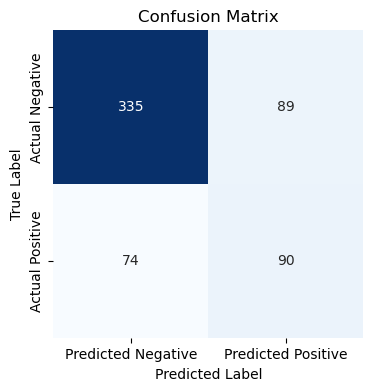

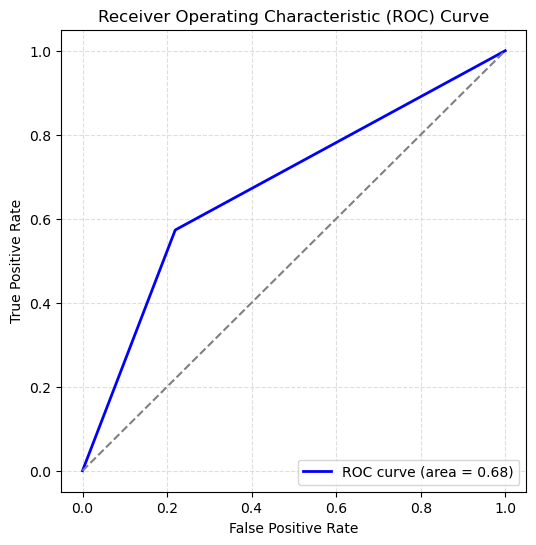

In [52]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1264    7]
 [  13  479]]
    
    AUC: 0.9996737732916274

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      0.99      0.99      1271
           1       0.99      0.97      0.98       492

    accuracy                           0.99      1763
   macro avg       0.99      0.98      0.99      1763
weighted avg       0.99      0.99      0.99      1763

    
TEST METRICS
    Confusion Matrix: 
    [[376  48]
 [ 78  86]]
    
    AUC: 0.8224229176254028

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.89      0.86       424
           1       0.64      0.52      0.58       164

    accuracy                           0.79       588
   macro avg       0.73      0.71      0.72       588
weighted avg       0.78      0.79      0.78       588

    


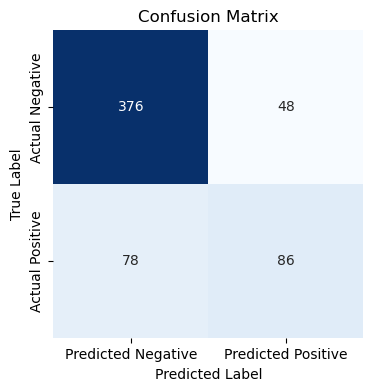

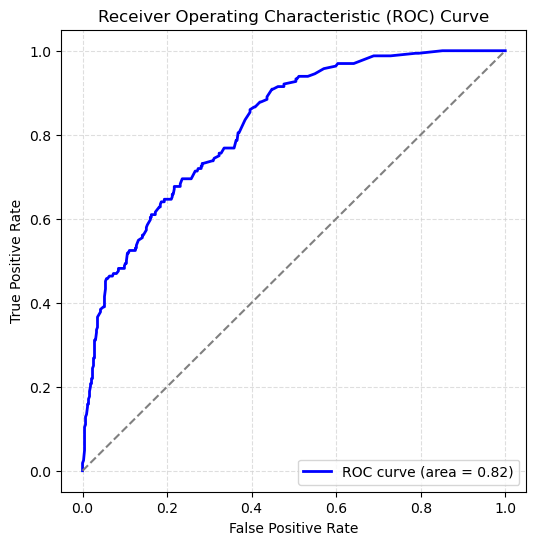

In [53]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1206   65]
 [ 292  200]]
    
    AUC: 0.8583376510397678

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.95      0.87      1271
           1       0.75      0.41      0.53       492

    accuracy                           0.80      1763
   macro avg       0.78      0.68      0.70      1763
weighted avg       0.79      0.80      0.78      1763

    
TEST METRICS
    Confusion Matrix: 
    [[402  22]
 [ 99  65]]
    
    AUC: 0.8444115278416935

    Classification Report:
                  precision    recall  f1-score   support

           0       0.80      0.95      0.87       424
           1       0.75      0.40      0.52       164

    accuracy                           0.79       588
   macro avg       0.77      0.67      0.69       588
weighted avg       0.79      0.79      0.77       588

    


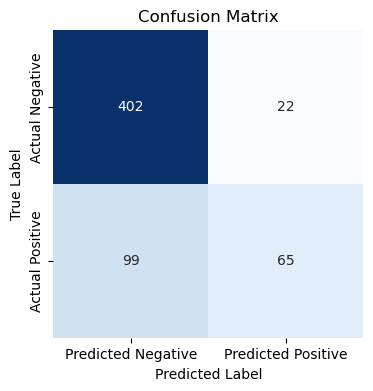

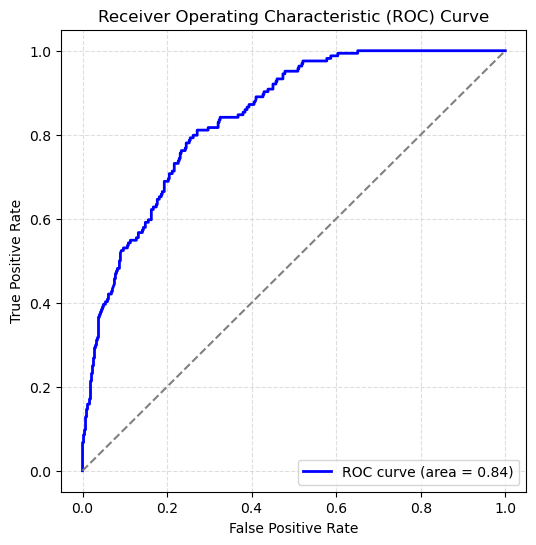

In [54]:
# Step 2: Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1181   90]
 [ 272  220]]
    
    AUC: 0.8589757121017316

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.93      0.87      1271
           1       0.71      0.45      0.55       492

    accuracy                           0.79      1763
   macro avg       0.76      0.69      0.71      1763
weighted avg       0.78      0.79      0.78      1763

    
TEST METRICS
    Confusion Matrix: 
    [[390  34]
 [ 97  67]]
    
    AUC: 0.8022966520938795

    Classification Report:
                  precision    recall  f1-score   support

           0       0.80      0.92      0.86       424
           1       0.66      0.41      0.51       164

    accuracy                           0.78       588
   macro avg       0.73      0.66      0.68       588
weighted avg       0.76      0.78      0.76       588

    


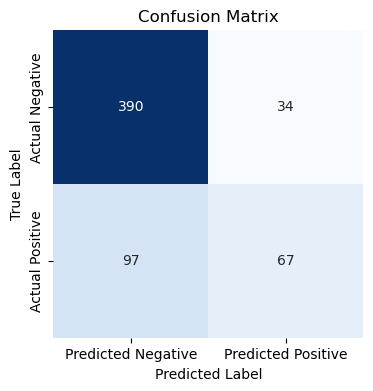

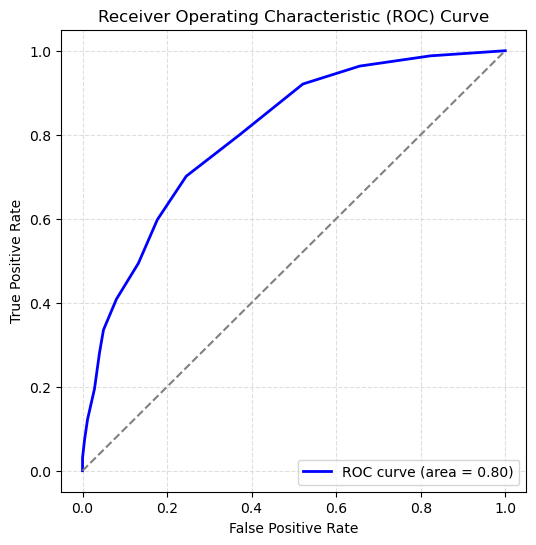

In [55]:
# Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1271    0]
 [  20  472]]
    
    AUC: 0.9996801698937524

    Classification Report:
                  precision    recall  f1-score   support

           0       0.98      1.00      0.99      1271
           1       1.00      0.96      0.98       492

    accuracy                           0.99      1763
   macro avg       0.99      0.98      0.99      1763
weighted avg       0.99      0.99      0.99      1763

    
TEST METRICS
    Confusion Matrix: 
    [[365  59]
 [ 76  88]]
    
    AUC: 0.7902309595029913

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.86      0.84       424
           1       0.60      0.54      0.57       164

    accuracy                           0.77       588
   macro avg       0.71      0.70      0.70       588
weighted avg       0.76      0.77      0.77       588

    


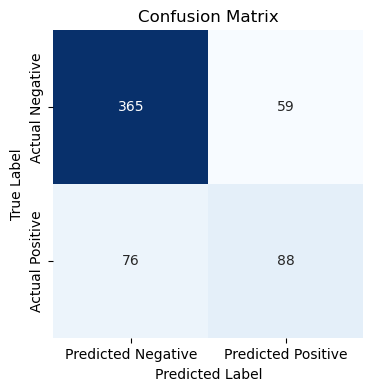

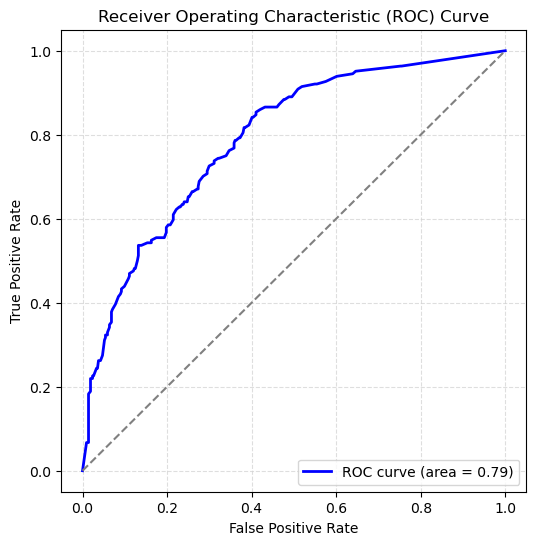

In [56]:
# Step 2: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1156  115]
 [ 220  272]]
    
    AUC: 0.8713467406113873

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.91      0.87      1271
           1       0.70      0.55      0.62       492

    accuracy                           0.81      1763
   macro avg       0.77      0.73      0.75      1763
weighted avg       0.80      0.81      0.80      1763

    
TEST METRICS
    Confusion Matrix: 
    [[381  43]
 [ 71  93]]
    
    AUC: 0.8467124942475841

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.90      0.87       424
           1       0.68      0.57      0.62       164

    accuracy                           0.81       588
   macro avg       0.76      0.73      0.74       588
weighted avg       0.80      0.81      0.80       588

    


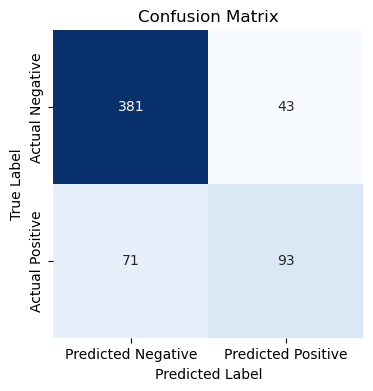

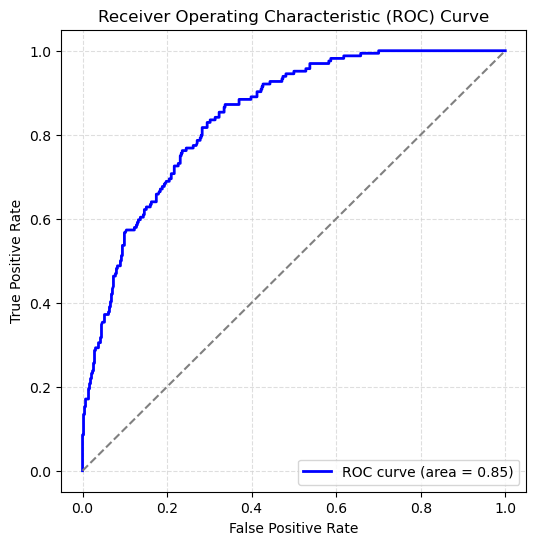

In [57]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1172   99]
 [ 196  296]]
    
    AUC: 0.9023126914982762

    Classification Report:
                  precision    recall  f1-score   support

           0       0.86      0.92      0.89      1271
           1       0.75      0.60      0.67       492

    accuracy                           0.83      1763
   macro avg       0.80      0.76      0.78      1763
weighted avg       0.83      0.83      0.83      1763

    
TEST METRICS
    Confusion Matrix: 
    [[378  46]
 [ 75  89]]
    
    AUC: 0.8483950759318913

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.89      0.86       424
           1       0.66      0.54      0.60       164

    accuracy                           0.79       588
   macro avg       0.75      0.72      0.73       588
weighted avg       0.79      0.79      0.79       588

    


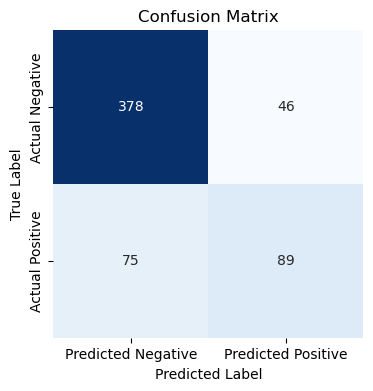

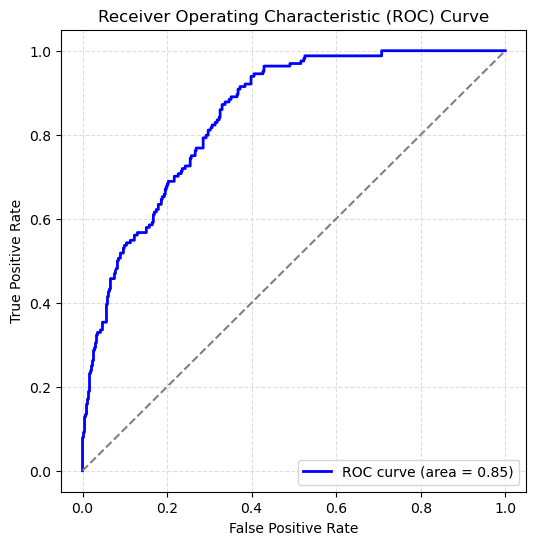

In [58]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [68]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[1255   16]
 [  27  465]]
    
    AUC: 0.9979946652338278

    Classification Report:
                  precision    recall  f1-score   support

           0       0.98      0.99      0.98      1271
           1       0.97      0.95      0.96       492

    accuracy                           0.98      1763
   macro avg       0.97      0.97      0.97      1763
weighted avg       0.98      0.98      0.98      1763

    
TEST METRICS
    Confusion Matrix: 
    [[367  57]
 [ 84  80]]
    
    AUC: 0.81313276576162

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.87      0.84       424
           1       0.58      0.49      0.53       164

    accuracy                           0.76       588
   macro avg       0.70      0.68      0.69       588
weighted avg       0.75      0.76      0.75       588

    


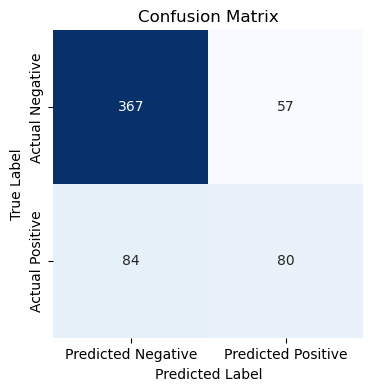

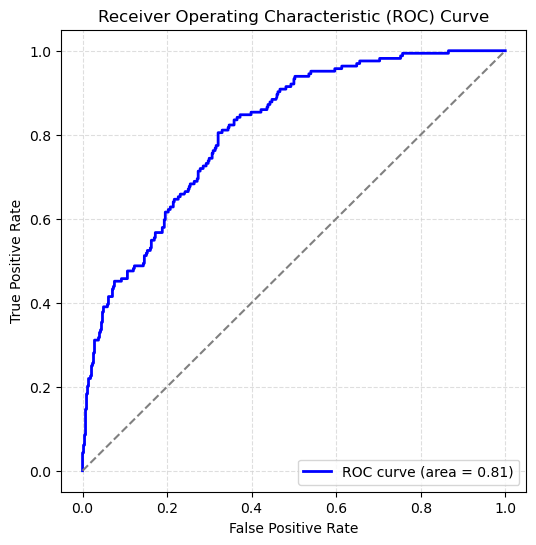

In [60]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1215   56]
 [  90  402]]
    
    AUC: 0.9779525116258244

    Classification Report:
                  precision    recall  f1-score   support

           0       0.93      0.96      0.94      1271
           1       0.88      0.82      0.85       492

    accuracy                           0.92      1763
   macro avg       0.90      0.89      0.89      1763
weighted avg       0.92      0.92      0.92      1763

    
TEST METRICS
    Confusion Matrix: 
    [[375  49]
 [ 77  87]]
    
    AUC: 0.833223078693051

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.88      0.86       424
           1       0.64      0.53      0.58       164

    accuracy                           0.79       588
   macro avg       0.73      0.71      0.72       588
weighted avg       0.78      0.79      0.78       588

    


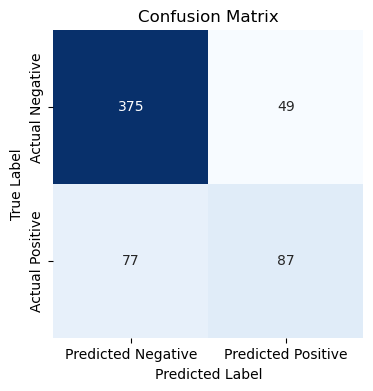

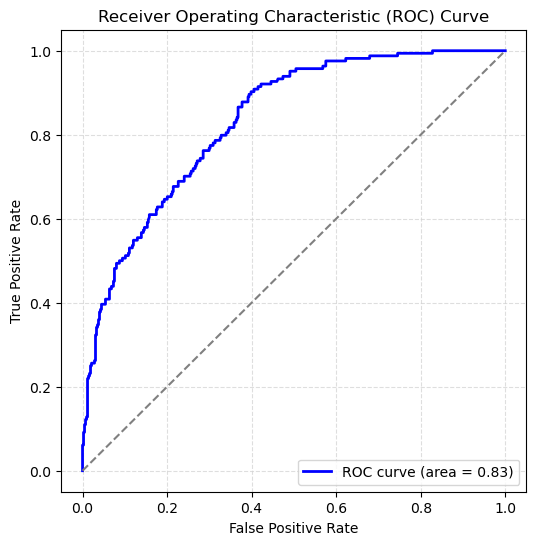

In [61]:
# Step 2: Init the Model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [62]:
fi = pd.DataFrame(list(zip(X.columns, gb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,Strength,0.295554
7,Weaknesses_Kryptonite,0.215161
2,Intelligence,0.184308
1,Speed,0.144178
5,SpecialAbilities_Super Strength,0.092775
4,SpecialAbilities_Invisibility,0.032272
11,Universe_encoded,0.008962
9,Weaknesses_Silver,0.008285
8,Weaknesses_Magic,0.006451
6,SpecialAbilities_Telekinesis,0.006278


In [65]:
fi = pd.DataFrame(list(zip(X.columns, xgb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
7,Weaknesses_Kryptonite,0.412690
5,SpecialAbilities_Super Strength,0.108565
0,Strength,0.070614
6,SpecialAbilities_Telekinesis,0.058091
2,Intelligence,0.055934
4,SpecialAbilities_Invisibility,0.049799
1,Speed,0.049173
3,SpecialAbilities_Flight,0.048528
9,Weaknesses_Silver,0.043668
8,Weaknesses_Magic,0.035372


In [64]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.feature_importances_ / sum(lgbm.feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
1,Speed,0.235667
2,Intelligence,0.229667
0,Strength,0.223000
11,Universe_encoded,0.064667
5,SpecialAbilities_Super Strength,0.043667
4,SpecialAbilities_Invisibility,0.040000
9,Weaknesses_Silver,0.036667
6,SpecialAbilities_Telekinesis,0.028333
8,Weaknesses_Magic,0.027667
7,Weaknesses_Kryptonite,0.027333


In [66]:
fi = pd.DataFrame(list(zip(X.columns, ada.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
2,Intelligence,0.32
0,Strength,0.26
1,Speed,0.18
7,Weaknesses_Kryptonite,0.06
5,SpecialAbilities_Super Strength,0.04
6,SpecialAbilities_Telekinesis,0.04
3,SpecialAbilities_Flight,0.02
4,SpecialAbilities_Invisibility,0.02
8,Weaknesses_Magic,0.02
9,Weaknesses_Silver,0.02


In [80]:
#tired of scrolling between models, this is showing the values side by side
#adding the confusion matrix too
# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'K Neighbors': KNeighborsClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


# List to store metrics
results = []

# Loop through models, train, and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For AUC

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    # the confusion matrix values should be in this order [[True Positive, False Negative],[False Positive, True Negative]]
    
    results.append(metrics)

# Convert results to DataFrame
metrics_df = pd.DataFrame(results)

# Display the DataFrame
metrics_df.head(10)

,Model,Accuracy,Precision,Recall,F1 Score,AUC,Confusion Matrix
0,Random Forest,0.777211,0.625954,0.500000,0.555932,0.817612,"[[375, 49], [82, 82]]"
1,Logistic Regression,0.802721,0.676471,0.560976,0.613333,0.848266,"[[380, 44], [72, 92]]"
2,Support Vector Classifier,0.794218,0.747126,0.396341,0.517928,0.844397,"[[402, 22], [99, 65]]"
3,Decision Tree,0.724490,0.505814,0.530488,0.517857,0.669552,"[[339, 85], [77, 87]]"
4,K Neighbors,0.782313,0.655172,0.463415,0.542857,0.773858,"[[384, 40], [88, 76]]"
5,Extra Trees,0.763605,0.586207,0.518293,0.550162,0.795113,"[[364, 60], [79, 85]]"
6,AdaBoost,0.806122,0.683824,0.567073,0.620000,0.846712,"[[381, 43], [71, 93]]"
7,Gradient Boosting,0.794218,0.659259,0.542683,0.595318,0.848395,"[[378, 46], [75, 89]]"


In [ ]:
#adaboost is probably the best

In [81]:
# trying to productionalize this model.....

In [82]:
# Retrain the model on the ENTIRE dataset
ada = AdaBoostClassifier(random_state=42)
ada.fit(X, y)

AdaBoostClassifier(random_state=42)

In [84]:
# Save off my models
import pickle

# Scaler
# pickle.dump(scaler, open("battle_scaler.h5", 'wb'))

# Model
pickle.dump(gb, open("battle_model.h5", 'wb'))

In [85]:
#this is probably the first itteration
#need to clean up this notebook
# need to retry the pipeline